## Homework 1
## Extra Credit: Building regularized models for Boston data set 
Perform a bias variance analysis of the Boston housing data set with the thirteen predictors, following the steps on the simple data set above. Use sklearn's built-in functions to split the data into training, validation and test sets. What is the lowest achievable error on the test set with  λ=0 ? Select the best value for  λ  and report the test set error with the best  λ . Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. What is the test set error with quadratic features with the best  λ  chosen with the validation set? What is the test set error with cubic features with the best  λ  chosen with the validation set? Put your analysis code in a separate Python script or notebook called bostonexpt.py or bostonexpt.ipynb. Present your results analytically with plots to support your findings. Discuss the impact of regularization for building good models for the Boston housing data set.

## Split the data into training, validation and test sets

This dataset is divided into three parts:
- A training set that you will use to learn the model:  X,  y.
- A validation set for determining the regularization parameter: Xval, yval.
- A test set for evaluating the performance of your model:  Xtest, ytest. These are unseen examples that were not used during the training of the model.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plot_utils
import pandas as pd
import utils
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Load Data
print 'Loading Data...'
bdata = load_boston()
df = pd.DataFrame(data = bdata.data, columns = bdata.feature_names)
df
X = df.values
y = bdata.target

X_trainA, X_test, y_trainA, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_trainA, y_trainA, test_size=0.2)

# scale the features (use zero mean scaling)
X_train0,mu,sigma = utils.feature_normalize(X_train)
# add intercept term to X_train0
XX_train0 = np.vstack([np.ones((X_train0.shape[0],)),X_train0.T]).T

# normalize test and val sets with the same mu and sigma
X_test0 = (X_test - mu) / sigma
X_val0 = (X_val - mu) / sigma
# add a column of ones to both X_test0 and X_val0
XX_test0 = np.vstack([np.ones((X_test0.shape[0],)),X_test0.T]).T
XX_val0 = np.vstack([np.ones((X_val0.shape[0],)),X_val0.T]).T

print 'Done'

Loading Data...
Done


## What is the lowest achievable error on the test set with λ=0 ?

In [3]:
# Train linear regression with lambda = 0
rlr1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = rlr1.train(XX_train0, y_train, reg=0.0, num_iters=1000)
print 'Theta at lambda = 0 is ', theta_opt0

# error on the test
error_test = rlr1.loss(theta_opt0, XX_test0, y_test, 0)
print 'error on the test set with λ = 0 is: ', error_test

Optimization terminated successfully.
         Current function value: 11.117614
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Theta at lambda = 0 is  [ 22.8739944   -1.13695415   1.08414844   0.47628448   0.44780875
  -2.12384414   2.82026183   0.27197241  -2.99237082   2.73418302
  -2.35654313  -2.30349837   0.7398102   -3.73005315]
error on the test set with λ = 0 is:  7.1329151548


## Select the best value for λ and report the test set error with the best λ .

Optimization terminated successfully.
         Current function value: 11.117614
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 11.117703
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 11.117880
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 11.118499
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 11.120268
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Optimization terminated successfully.
         Current function value: 11.126450
         Iterations: 24
         Function evaluations:

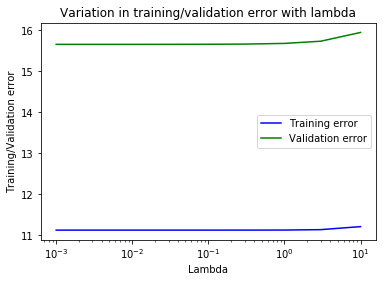

In [4]:
# train the model using different values of  λ  and compute the training error and validation error. 
# try λ in the following range: {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}.
reg_vec, error_train, error_val = utils.validation_curve(XX_train0,y_train,XX_val0,y_val)
print reg_vec
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()


In [5]:
# the best λ on the validation set is 0
# Train linear regression with lambda = 0
reg = 0
rlr2 = RegularizedLinearReg_SquaredLoss()
theta_opt2= rlr2.train(XX_train0, y_train, reg=reg, num_iters=1000)
print 'Theta at lambda = 0 is ', theta_opt2

# error on the test
error_test = rlr1.loss(theta_opt2, XX_test0, y_test, 0)
print 'error on the test set with λ = 0 is: ', error_test

Optimization terminated successfully.
         Current function value: 11.117614
         Iterations: 24
         Function evaluations: 25
         Gradient evaluations: 25
Theta at lambda = 0 is  [ 22.8739944   -1.13695415   1.08414844   0.47628448   0.44780875
  -2.12384414   2.82026183   0.27197241  -2.99237082   2.73418302
  -2.35654313  -2.30349837   0.7398102   -3.73005315]
error on the test set with λ = 0 is:  7.1329151548


## Polynomial regression
Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. What is the test set error with quadratic features with the best λ chosen with the validation set? What is the test set error with cubic features with the best λ chosen with the validation set?

## Quadratic

In [6]:
from utils import feature_normalize
import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize
# We will consider quadratic features.
p = 2
print 'Quadratic features...'
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly_train = poly.fit_transform(X_train)
# scale the features (use zero mean scaling)
X_train1,mu,sigma = utils.feature_normalize(X_poly_train)
# add intercept term to X_train1
XX_train1 = np.vstack([np.ones((X_train1.shape[0],)),X_train1.T]).T

# map X_test and X_val into the same polynomial features
X_poly_test = poly.fit_transform(X_test)
X_poly_val = poly.fit_transform(X_val)
# normalize test and val sets with the same mu and sigma
X_test1 = (X_poly_test - mu) / sigma
X_val1 = (X_poly_val - mu) / sigma
# add a column of ones to both X_test1 and X_val1
XX_test1 = np.vstack([np.ones((X_test1.shape[0],)),X_test1.T]).T
XX_val1 = np.vstack([np.ones((X_val1.shape[0],)),X_val1.T]).T
print 'Done'

Quadratic features...
Done


## Quadratic: Select the best value for λ and report the test set error with the best λ .
What is the test set error with quadratic features with the best λ chosen with the validation set?

Optimization terminated successfully.
         Current function value: 2.456301
         Iterations: 788
         Function evaluations: 794
         Gradient evaluations: 794
Optimization terminated successfully.
         Current function value: 2.496648
         Iterations: 752
         Function evaluations: 758
         Gradient evaluations: 758
Optimization terminated successfully.
         Current function value: 2.539250
         Iterations: 657
         Function evaluations: 663
         Gradient evaluations: 663
Optimization terminated successfully.
         Current function value: 2.635311
         Iterations: 535
         Function evaluations: 541
         Gradient evaluations: 541
Optimization terminated successfully.
         Current function value: 2.801222
         Iterations: 394
         Function evaluations: 400
         Gradient evaluations: 400
Optimization terminated successfully.
         Current function value: 3.102222
         Iterations: 277
         Function ev

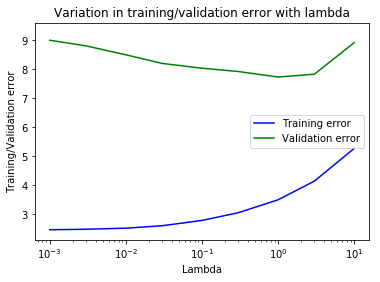

In [7]:
# train the model using different values of  λ  and compute the training error and validation error. 
# try λ in the following range: {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}.
reg_vec, error_train, error_val = utils.validation_curve(XX_train1,y_train,XX_val1,y_val)
print reg_vec
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.show()

In [8]:
# the best λ on the validation set is 0.1
# Train linear regression with lambda = 0.1
reg = 0.3
rlr3 = RegularizedLinearReg_SquaredLoss()
theta_opt3= rlr3.train(XX_train1, y_train, reg=reg, num_iters=1000)

# error on the test
error_test = rlr3.loss(theta_opt3, XX_test1, y_test, 0)
print 'error on the test set with λ =', reg, ' is: ', error_test

Optimization terminated successfully.
         Current function value: 3.524316
         Iterations: 194
         Function evaluations: 200
         Gradient evaluations: 200
error on the test set with λ = 0.3  is:  6.22595500666


## Cubic

In [9]:
# Map X onto polynomial features and normalize
# We will consider cubic features.
p = 3
print 'Cubic features...'
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly_train = poly.fit_transform(X_train)
# scale the features (use zero mean scaling)
X_train2,mu,sigma = utils.feature_normalize(X_poly_train)
# add intercept term to X_train1
XX_train2 = np.vstack([np.ones((X_train2.shape[0],)),X_train2.T]).T

# map X_test and X_val into the same polynomial features
X_poly_test = poly.fit_transform(X_test)
X_poly_val = poly.fit_transform(X_val)
# normalize test and val sets with the same mu and sigma
X_test2 = (X_poly_test - mu) / sigma
X_val2 = (X_poly_val - mu) / sigma
# add a column of ones to both X_test1 and X_val1
XX_test2 = np.vstack([np.ones((X_test2.shape[0],)),X_test2.T]).T
XX_val2 = np.vstack([np.ones((X_val2.shape[0],)),X_val2.T]).T
print 'Done'

Cubic features...
Done


## Cubic: Select the best value for λ and report the test set error with the best λ .
What is the test set error with cubic features with the best λ chosen with the validation set?

Optimization terminated successfully.
         Current function value: 0.024166
         Iterations: 2478
         Function evaluations: 2490
         Gradient evaluations: 2490
Optimization terminated successfully.
         Current function value: 0.482055
         Iterations: 1158
         Function evaluations: 1169
         Gradient evaluations: 1169
Optimization terminated successfully.
         Current function value: 0.657783
         Iterations: 939
         Function evaluations: 950
         Gradient evaluations: 950
Optimization terminated successfully.
         Current function value: 0.897466
         Iterations: 702
         Function evaluations: 713
         Gradient evaluations: 713
Optimization terminated successfully.
         Current function value: 1.163441
         Iterations: 515
         Function evaluations: 526
         Gradient evaluations: 526
Optimization terminated successfully.
         Current function value: 1.505248
         Iterations: 335
         Funct

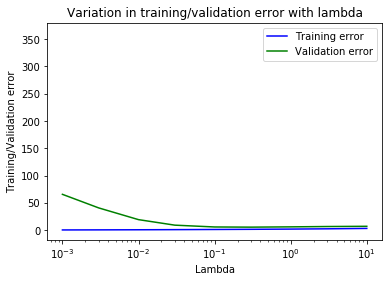

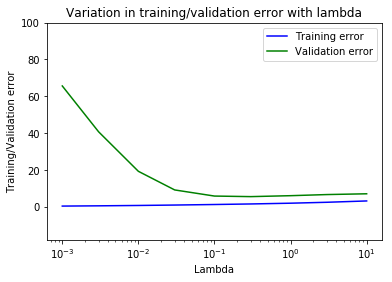

In [11]:
# train the model using different values of  λ  and compute the training error and validation error. 
# try λ in the following range: {0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10}.
reg_vec, error_train, error_val = utils.validation_curve(XX_train2,y_train,XX_val2,y_val)
print reg_vec
plot_utils.plot_lambda_selection(reg_vec,error_train,error_val)
plt.ylim(ymax = 100)
plt.show()

In [16]:
# the best λ on the validation set is 1
# Train linear regression with lambda = 1
reg = 1
rlr4 = RegularizedLinearReg_SquaredLoss()
theta_opt4= rlr4.train(XX_train2, y_train, reg=reg, num_iters=10000)

# error on the test
error_test = rlr4.loss(theta_opt4, XX_test2, y_test, 0)
print 'error on the test set with λ =', reg, ' is: ', error_test

Optimization terminated successfully.
         Current function value: 2.438068
         Iterations: 147
         Function evaluations: 158
         Gradient evaluations: 158
error on the test set with λ = 1  is:  4.83142660031
